# Imports

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Dataset

In [23]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset.csv')
print('Data set shape:', df.shape)

Data set shape: (1477, 28)


In [24]:
# Display the first few rows of the DataFrame
df.head()

,Body_Level,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Smoking,Meal_Count,...,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking,BMI
0,3,1,0.646666,0.690578,1.016135,1,-0.199318,0.236558,0,0.402155,...,0,0,1,0,1,0,0,0,0,0.823278
1,3,1,-0.649582,-0.003364,0.686578,1,0.428856,-1.026715,0,-1.792121,...,0,0,1,0,0,0,0,1,0,0.806112
2,3,0,-0.537725,0.493657,1.790354,1,1.069487,1.401741,0,0.402155,...,0,0,1,0,0,0,0,1,0,1.751663
3,3,0,-1.291128,-0.545353,-0.036499,1,0.986227,-1.620907,0,0.402155,...,0,0,1,0,0,0,0,1,0,0.219426
4,3,0,0.270463,-0.818715,0.951256,1,1.069487,0.974150,0,0.402155,...,0,0,1,0,0,0,0,1,0,1.574457


In [25]:
#Label percentages
df['Body_Level'].value_counts(normalize=True)

3    0.460393
2    0.274882
1    0.136087
0    0.128639
Name: Body_Level, dtype: float64

In [26]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Body_Level', axis=1), df['Body_Level'], test_size=0.2, random_state=42, stratify=df['Body_Level'])
# Print the shapes of the training and test sets
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (1181, 27)
Test set shape: (296, 27)


In [27]:
#Label percentages
Y_train.value_counts(normalize=True)

3    0.460627
2    0.274344
1    0.136325
0    0.128704
Name: Body_Level, dtype: float64

In [28]:
#Label percentages
Y_test.value_counts(normalize=True)

3    0.459459
2    0.277027
1    0.135135
0    0.128378
Name: Body_Level, dtype: float64

# Common Functions

In [29]:
def apply_crossvalidation(model, X_train, Y_train, k=10):

    # create a k-fold cross-validation iterator
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # perform k-fold cross-validation and compute accuracy
    scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')
    # print the average accuracy score and its standard deviation
    print('Accuracy: {} +/- {}'.format(scores.mean(), scores.std()))

    # perform k-fold cross-validation and compute F1-score
    scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='f1_weighted')
    # print the average F1-score and its standard deviation
    print('F1-score: {} +/- {}'.format(scores.mean(), scores.std()))

In [30]:
def Evaluate(model, X_test, Y_test):
    
    # predict the class labels for the test set
    y_pred = model.predict(X_test)

    # calculate the accuracy
    accuracy = accuracy_score(Y_test, y_pred)

    # calculate the precision
    precision = precision_score(Y_test, y_pred, average='weighted')

    # calculate the recall
    recall = recall_score(Y_test, y_pred, average='weighted')

    # calculate the F1 score
    f1 = f1_score(Y_test, y_pred, average='weighted')

    # calculate the confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

    # print the results
    print('Accuracy: {}'.format(accuracy))
    print('weighted F1 score: {}'.format(f1))
    print('weighted Precision: {}'.format(precision))
    print('weighted Recall: {}'.format(recall))
    print('Confusion matrix:\n', cm)

# logistic regression

learning curve

d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

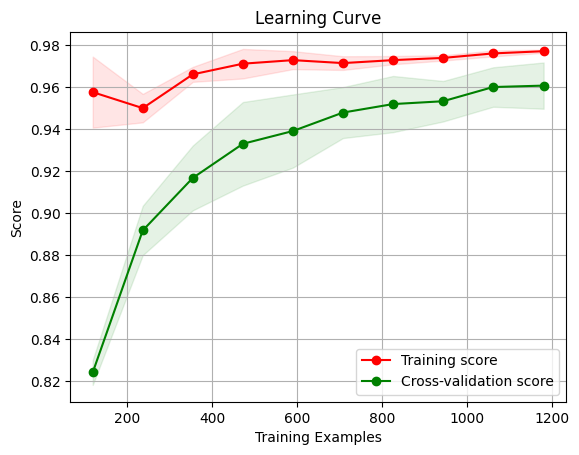

In [31]:
from sklearn.model_selection import learning_curve

# Load the data
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

# Create a random forest classifier
model = LogisticRegression(random_state=42)

# Define the number of training samples at each iteration
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot the shaded area indicating the variance (± one standard deviation)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()


bias variance analysis

In [32]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import bias_variance_decomp

# Create a random forest classifier
model = LogisticRegression(random_state=42)

# Calculate bias and variance
mse, bias, variance = bias_variance_decomp(model, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', num_rounds=200, random_seed=42)

print("Mean Squared Error:", mse)
print("Bias:", bias)
print("Variance:", variance)

d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Mean Squared Error: 0.05364864864864865
Bias: 0.03909780405405405
Variance: 0.014550844594594596


d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

simple fit and evaluate

In [33]:
# Create a logistic regression object
lorg_base = LogisticRegression(random_state=42)

# Fit the model to the training data
lorg_base.fit(X_train, Y_train)

d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [34]:
# Predict the labels of the test set
y_pred = lorg_base.predict(X_test)

# Evaluate the model
Evaluate(lorg_base, X_test, Y_test)

Accuracy: 0.9527027027027027
weighted F1 score: 0.9514172095561751
weighted Precision: 0.9531175121062763
weighted Recall: 0.9527027027027027
Confusion matrix:
 [[ 37   1   0   0]
 [  2  30   8   0]
 [  0   2  80   0]
 [  0   0   1 135]]


In [35]:
# Look at parameters used by our current logistic regression model
print('Parameters currently in use:\n')
pprint(lorg_base.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


Hyperparameter Tuning
- Logistic regression does not really have any critical hyperparameters to tune.
- The main hyperparameters we may tune in logistic regression are: solver, penalty, and regularization strength (sklearn documentation).
- grid search is enough here.

In [36]:
# Create the parameter grid
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
}
# Create a based model
lorg = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lorg, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [37]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
315 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [38]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [39]:
best_grid = LogisticRegression(**grid_search.best_params_, random_state=42)
best_grid.fit(X_train, Y_train)
Evaluate(best_grid, X_test, Y_test)

Accuracy: 0.9831081081081081
weighted F1 score: 0.9832441513604326
weighted Precision: 0.9835907335907335
weighted Recall: 0.9831081081081081
Confusion matrix:
 [[ 37   1   0   0]
 [  0  39   1   0]
 [  0   2  80   0]
 [  0   0   1 135]]


# Analysis without the BMI feature

In [40]:
# remove BMI feature from the train and test sets
X_train = X_train.drop('BMI', axis=1)
X_test = X_test.drop('BMI', axis=1)

# logistic regression

learning curve

d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

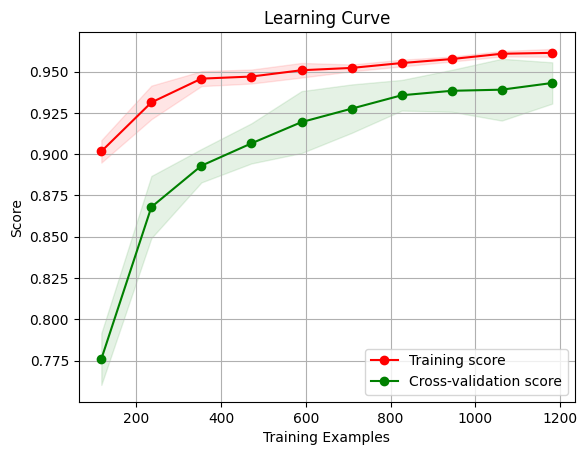

In [41]:
from sklearn.model_selection import learning_curve

# Load the data and drop BMI feature
X = df.drop(['Body_Level', 'BMI'], axis=1)
y = df['Body_Level']

# Create a random forest classifier
model = LogisticRegression(random_state=42)

# Define the number of training samples at each iteration
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot the shaded area indicating the variance (± one standard deviation)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

bias variance analysis

In [42]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import bias_variance_decomp

# Create a random forest classifier
model = LogisticRegression(random_state=42)

# Calculate bias and variance
mse, bias, variance = bias_variance_decomp(model, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', num_rounds=200, random_seed=42)

print("Mean Squared Error:", mse)
print("Bias:", bias)
print("Variance:", variance)

d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Mean Squared Error: 0.07184121621621621
Bias: 0.0558139358108108
Variance: 0.016027280405405405


d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

simple fit and evaluate

In [43]:
# Create a logistic regression object
lorg_base = LogisticRegression(random_state=42)

# Fit the model to the training data
lorg_base.fit(X_train, Y_train)

d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [44]:
# Predict the labels of the test set
y_pred = lorg_base.predict(X_test)

# Evaluate the model
Evaluate(lorg_base, X_test, Y_test)

Accuracy: 0.9358108108108109
weighted F1 score: 0.932347482271511
weighted Precision: 0.9376783844868952
weighted Recall: 0.9358108108108109
Confusion matrix:
 [[ 37   1   0   0]
 [  2  25  13   0]
 [  0   2  80   0]
 [  0   0   1 135]]


In [45]:
# Look at parameters used by our current logistic regression model
print('Parameters currently in use:\n')
pprint(lorg_base.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


Hyperparameter Tuning
- Logistic regression does not really have any critical hyperparameters to tune.
- The main hyperparameters we may tune in logistic regression are: solver, penalty, and regularization strength (sklearn documentation).
- grid search is enough here.

In [46]:
# Create the parameter grid
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
}
# Create a based model
lorg = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lorg, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [47]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
315 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [48]:
grid_search.best_params_

{'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}

In [49]:
best_grid = LogisticRegression(**grid_search.best_params_, random_state=42)
best_grid.fit(X_train, Y_train)
Evaluate(best_grid, X_test, Y_test)

Accuracy: 0.9831081081081081
weighted F1 score: 0.9833176859868128
weighted Precision: 0.98425214987715
weighted Recall: 0.9831081081081081
Confusion matrix:
 [[ 37   1   0   0]
 [  0  40   0   0]
 [  0   3  79   0]
 [  0   0   1 135]]


In [50]:
"""
We splitted the data into 80% training and 20% test sets.

We tried logistic regression with and without the BMI feature and we noticed that:
if we include the BMI feature the simple logistic regression model with default hyperparameters achieves 
a weighted F1-score of 97.23% on the test set, However, if we exclude the BMI feature it achieves a weighted 
F1-score of 92.98% on the test set.

Since the main hyperparamters that affect the performance of the logistic regression model are the solver,
penalty and C, we used grid search to try all combindations of them and find the best values for those hyperparamters.

The weighted F1-score of the model with the BMI feature increased from 97.23% to 97.33% after using grid search
to find the best hyperparamters.

The weighted F1-score of the model without the BMI feature increased from 92.98% to 97.33% after using grid search
achieving the same weighted F1-score as the model with the BMI feature.

So although the BMI freature helps the model to achieve the best performance without using grid search,
it is not that important to logitic regression model as it is to the random forest model.

"""

'\nWe splitted the data into 80% training and 20% test sets.\n\nWe tried logistic regression with and without the BMI feature and we noticed that:\nif we include the BMI feature the simple logistic regression model with default hyperparameters achieves \na weighted F1-score of 97.23% on the test set, However, if we exclude the BMI feature it achieves a weighted \nF1-score of 92.98% on the test set.\n\nSince the main hyperparamters that affect the performance of the logistic regression model are the solver,\npenalty and C, we used grid search to try all combindations of them and find the best values for those hyperparamters.\n\nThe weighted F1-score of the model with the BMI feature increased from 97.23% to 97.33% after using grid search\nto find the best hyperparamters.\n\nThe weighted F1-score of the model without the BMI feature increased from 92.98% to 97.33% after using grid search\nachieving the same weighted F1-score as the model with the BMI feature.\n\nSo although the BMI freat